## 🛡️ Robust Scaler
<p style="margin-left: 45px; font-family: sans-serif; font-size: 19px;">Robust Scaler is a feature scaling technique that uses the median and the interquartile range (IQR) instead of mean and standard deviation (as in Standardization). It centers the data around zero (using median) and it scales based on the interquartile range, not the full range.
It’s specifically designed to handle outliers effectively.</p>

### ✅ When to Use Robust Scaler:
<ol style="margin-left: 40px; font-family: sans-serif; font-size: 19px;">
    <li>When your data contains outliers.</li>
    <li>When you want to scale features but keep the effect of outliers minimized.</li>
    <li>When you’re using algorithms that are sensitive to scale, such as: <strong>Linear Models (e.g., Linear/Logistic Regression), SVM, KNN / KMeans, PCA</strong> etc.</li>
</ol>


### Formula:
<p style="text-align: center; font-family: 'Cambria Math', serif; font-size: 21px;"><strong>
  𝑥′ = 
  <span style="display: inline-block; text-align: center; vertical-align: middle;">
    <span style="display: block; border-bottom: 1px solid white; padding: 2px 6px;">
      x − Median(X)
    </span>
    <span style="display: block; padding: 2px 6px;">
      IQR(x)
    </span>
  </span>
</strong>
</p>

<span style="font-size: 17px">Where:</span> <br>
<span style="font-size: 17px">IQR = 75th percentile (Q3) − 25th percentile (Q1)</span><br>
<span style="font-size: 17px">Median = 50th percentile</span>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame[['INDUS', 'RM', 'AGE',	'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']]

df.head()

,INDUS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,2.31,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,7.07,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,7.07,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,2.18,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,2.18,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='MEDV')
y = df['MEDV']
X_train, X_test, y_train, y_trst = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_train_scaled

array([[  0.73554356,  -1.21407035,   0.40748441, ...,   0.44117647,
         -2.06212252,   1.45677083],
       [ -0.03238242,  -0.5038526 ,  -0.44074844, ...,   0.67647059,
          0.21274498,  -0.25572917],
       [ -0.19275251,  -0.239866  ,  -1.13097713, ...,  -0.52941176,
         -1.43251572,  -0.32239583],
       ...,
       [ -0.50501157,   0.56951424,  -0.997921  , ...,  -0.5       ,
         -0.01799581,  -0.5140625 ],
       [  0.73554356,   0.56147404,   0.35135135, ...,   0.44117647,
        -13.87674103,   1.2859375 ],
       [  0.        ,   0.26130653,   0.16008316, ...,   0.64705882,
        -15.8020461 ,  -0.03072917]])

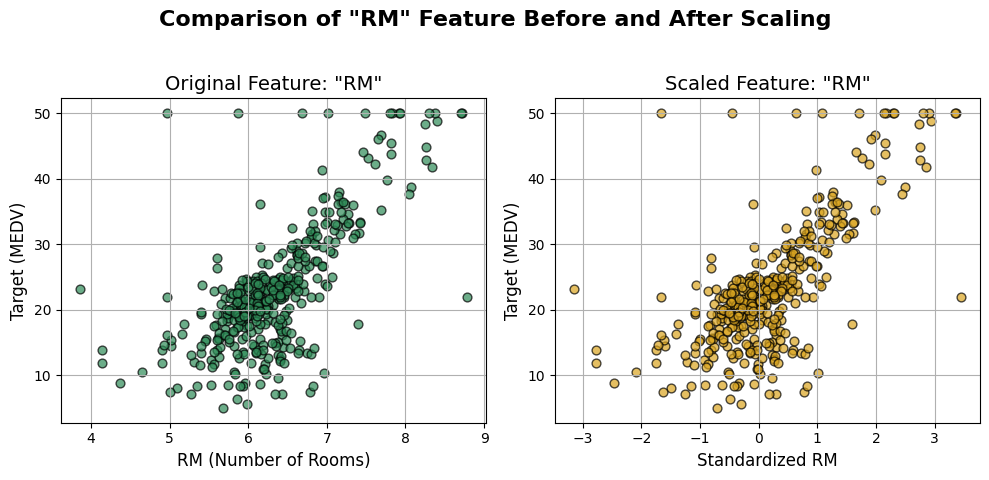

In [11]:
# Convert scaled version back to DataFrame with same column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

plt.figure(figsize=(10, 5))

# Original data scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X_train["RM"], y_train, color='seagreen', alpha=0.7, edgecolor='k', s=40)
plt.title('Original Feature: "RM"', fontsize=14)
plt.xlabel('RM (Number of Rooms)', fontsize=12)
plt.ylabel('Target (MEDV)', fontsize=12)
plt.grid(True)

# Scaled data scatter plot
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled_df["RM"], y_train, color='goldenrod', alpha=0.7, edgecolor='k', s=40)
plt.title('Scaled Feature: "RM"', fontsize=14)
plt.xlabel('Standardized RM', fontsize=12)
plt.ylabel('Target (MEDV)', fontsize=12)
plt.grid(True)

# Suptitle and layout
plt.suptitle('Comparison of "RM" Feature Before and After Scaling', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()